In [1]:
import pandas as pd

## 1. Data Example

In [3]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [4]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [5]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


## 2. Split feature vectors and labels

In [6]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [11]:
X.head(9)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0


In [12]:
# Y is labels
Y = df[['body_shape']]

In [13]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


## 3. Rescaling feature vectors to all have the same scale

In [15]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

## 4. Covariance Matrix of features

In [16]:
import numpy as np

In [17]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


## 5. Eigen Vectors and Eigen Values from Covariance Matrix

In [19]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [20]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.7318321731427545

## 6. Project data point onto selected Eigen Vector

In [21]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [23]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

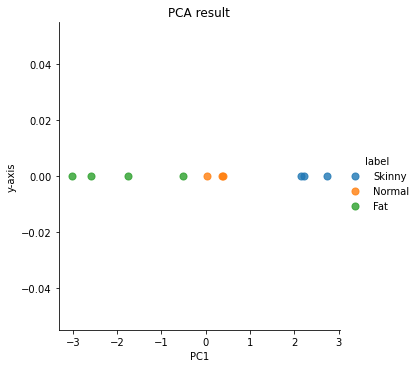

In [25]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

## 7. scikit-learn PCA

In [26]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

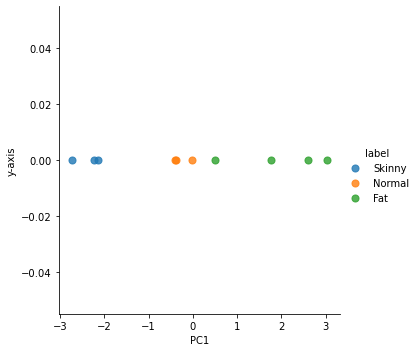

In [27]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color